In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join


# Read all results from txt files

aco_path = "./v1/ACO/"
aco_files = [f for f in listdir(aco_path) if isfile(join(aco_path, f))]

ga_path = "./v1/GA/"
ga_files = [f for f in listdir(ga_path) if isfile(join(ga_path, f))]

pso_path = "./v1/PSO/"
pso_files = [f for f in listdir(pso_path) if isfile(join(pso_path, f))]

pls_path = "./v1/PLS/"
pls_files = [f for f in listdir(pls_path) if isfile(join(pls_path, f))]

prs_path = "./v1/PRS/"
prs_files = [f for f in listdir(prs_path) if isfile(join(prs_path, f))]





# Ant Colony Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-iteration", "Iterations", "E-factor"]
df_aco = pd.DataFrame(columns = column_names)

for file in aco_files:
    f_path = join(aco_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    evp = float(res['B'][5]) # evaporation factor

    sup = float(res['B'][6]) # minimum support
    pat = float(res['B'][8]) # patterns
    mit = int(res['B'][9]) # maximum iteraction count
    
    # Fetch best-cost iteration values
    its = [0] * mit
    it_st = res.loc[res['B'] == ' Best Cost'].index[0] + 1 # iterations
    for i in range(mit):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    else:
        col = ""
                    
    df_aco = df_aco.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-iteration":mit, "Iterations":its, "E-factor": evp}, ignore_index=True)

    
    

# -------------------------------------------------------------------------------------
# Genetic Algorithm - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations", "N-pop", "PC"]
df_ga = pd.DataFrame(columns = column_names)

for file in ga_files:
    f_path = join(ga_path,file)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    pop = float(res['B'][5]) # population size
    pc = float(res['B'][6]) # population size


    sup = float(res['B'][7]) # minimum support
    pat = float(res['B'][9]) # patterns
    mit = int(res['B'][10]) # maximum iteraction count
    mal = int(res['B'][11]) # maximum evaluation count
       
        
    # Fetch best-cost iteration values
    its = [0] * mal
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mal):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    else:
        col = ""
        
    df_ga = df_ga.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its, "N-pop": pop, "PC": pc}, ignore_index=True)

    
    
    
    


# -------------------------------------------------------------------------------------
# Particle Swarm Optimization - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations", "N-particle", "Velocity", "C1", "C2"]
df_pso = pd.DataFrame(columns = column_names)

for file in pso_files:
    f_path = join(pso_path,file)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    vel = float(res['B'][5]) # velocity
    c1 = float(res['B'][6]) # personal coefficient
    c2 = float(res['B'][7]) # global coefficient
    npat = float(res['B'][8]) # particle count

    sup = float(res['B'][9]) # minimum support
    pat = float(res['B'][11]) # patterns
    mit = int(res['B'][12]) # maximum iteraction count
    mal = int(res['B'][13]) # maximum evaluation count

    
    # Fetch best-cost iteration values
    its = [0] * mal
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mal):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    else:
        col = ""
        
    df_pso = df_pso.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its, "N-particle": npat, "Velocity": vel, "C1": c1, "C2": c2}, ignore_index=True)

    

    
    
# -------------------------------------------------------------------------------------
# Pure Local Search - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations", "Step-size"]
df_pls = pd.DataFrame(columns = column_names)

for file in pls_files:
    f_path = join(pls_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    stp = float(res['B'][5]) # step size

    sup = float(res['B'][6]) # minimum support
    pat = float(res['B'][8]) # patterns
    mit = int(res['B'][9]) # maximum iteraction count
    mal = int(res['B'][10]) # maximum evaluation count

    
    # Fetch best-cost iteration values
    its = [0] * mal
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mal):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    else:
        col = ""
                    
    df_pls = df_pls.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its, "Step-size": stp}, ignore_index=True)

    
    
    

# -------------------------------------------------------------------------------------
# Pure Local Search - Data Frame
column_names = ["Data-set", "Size", "Algorithm", "Support", "Run-time", "Memory", "Pattern-count", "Max-evaluation", "Evaluations"]
df_prs = pd.DataFrame(columns = column_names)

for file in prs_files:
    f_path = join(prs_path,file)
    # res = pd.read_csv(f_path, sep = ': ', header=None, engine='python', nrows=10)
    res = pd.read_csv(f_path, names=["A","B"], sep = ':', header=None, engine='python')
    run = float(res['B'][0][0:6]) # run-time
    mem = float(res['B'][1][0:5]) # memory
    alg = res['B'][2] # algorithm
    att = int(res['B'][3]) # number of attributes in the data set
    size = int(res['B'][4])  # data set size

    sup = float(res['B'][5]) # minimum support
    pat = float(res['B'][7]) # patterns
    mit = int(res['B'][8]) # maximum iteraction count
    mal = int(res['B'][9]) # maximum evaluation count

    
    # Fetch best-cost iteration values
    its = [0] * mal
    it_st = res.loc[res['B'] == ' Cost'].index[0] + 1 # iterations
    for i in range(mal):
        it = i + it_st
        its[i] = float(res['B'][it]) # cost
    
    if att == 11:
        col = "HCV"
    else:
        col = ""
                    
    df_prs = df_prs.append({"Data-set": col, "Size": size, "Algorithm":alg, "Support": sup, "Run-time":run, "Memory":mem, "Pattern-count":pat, "Max-evaluation":mal, "Evaluations":its}, ignore_index=True)

    

In [2]:
import numpy as np


# Combining the results
frames = [df_ga, df_pso, df_pls, df_prs]
df_res = pd.concat(frames, ignore_index=True)
# Only include these columns
df_res = df_res[['Data-set', 'Algorithm', 'Pattern-count', 'Max-evaluation', 'Evaluations']]

data_sets = ['HCV']
algorithms = ['GA-GRAANK', 'PSO-GRAANK', 'PLS-GRAANK', 'PRS-GRAANK']
evals = [10, 100, 1000]
eval_data = []

for ds in data_sets:
    df1 = df_res.loc[df_res['Data-set'] == ds]
    
    for alg in algorithms:
        df2 = df1.loc[df1['Algorithm'].str.contains(alg)]
                
        for ev in evals:
            df3 = df2.loc[df2['Max-evaluation'] == ev]
            # print(df3)

            # 100 rows
            eval_arr = []
            for index,row in df3.iterrows():
                # 10/100/1000 evaluations
                eval_arr.append(row['Evaluations'])
            eval_arr = np.array(eval_arr)
            eval_min = np.min(eval_arr, axis=0)
            eval_avg = np.mean(eval_arr, axis=0)
            eval_max = np.max(eval_arr, axis=0)
            eval_std = np.std(eval_arr, axis=0)
            eval_avg_mn = eval_avg - eval_std
            eval_avg_pl = eval_avg + eval_std

            eval_data.append([ds, alg, df3['Pattern-count'].mean(), df3['Pattern-count'].std(), ev, eval_min, eval_avg_mn, eval_avg, eval_avg_pl, eval_max])

df_data = pd.DataFrame(data=eval_data, columns=['Data-set', 'Algorithm', 'Patterns (mean)', 'Patterns (std)', 'Evaluations','Evaluations (min)', 'Evaluations (mu-sigma)', 'Evaluations (mu)', 'Evaluations (mu+sigma)', 'Evaluations (max)'])
df_data
#print(eval_arr)
#print(eval_avg)
#print(eval_std)
#print(eval_avg_mn)




,Data-set,Algorithm,Patterns (mean),Patterns (std),Evaluations,Evaluations (min),Evaluations (mu-sigma),Evaluations (mu),Evaluations (mu+sigma),Evaluations (max)
0,HCV,GA-GRAANK,0.88,0.326599,10,"[5.7901197396762164e-06, 0.0003920031360250882...","[-0.0003396957363596606, -0.008475213080201278...","[0.00031350097456873553, 0.01879027552332233, ...","[0.0009666976854971316, 0.046055764126845936, ...","[0.005813953488372093, 0.25, 0.125, 0.25, 0.12..."
1,HCV,GA-GRAANK,1.11,0.680092,100,"[9.643201542912246e-06, 0.000942507068803016, ...","[-0.0003293495678051859, 0.0004913630811485166...","[0.0003989232422954325, 0.016134823529710348, ...","[0.0011271960523960508, 0.031778283978272176, ...","[0.0045662100456621, 0.09090909090909091, 0.09..."
2,HCV,GA-GRAANK,1.19,0.720480,1000,"[5.94307720651599e-06, 0.0018018018018018018, ...","[-0.0002754350841045778, 0.0003331814811553778...","[0.0004129242622015434, 0.01622675646095995, 0...","[0.0011012836085076646, 0.032120331440764524, ...","[0.004629629629629629, 0.09090909090909091, 0...."
3,HCV,PSO-GRAANK,0.80,0.402015,10,"[1.749107954942979e-05, 1.749107954942979e-05,...","[-0.00014917747155588908, -0.00014917747155588...","[0.000342188710469835, 0.000342188710469835, 0...","[0.000833554892495559, 0.000833554892495559, 0...","[0.0037593984962406013, 0.0037593984962406013,..."
4,HCV,PSO-GRAANK,0.86,0.348735,100,"[1.0058540706914241e-05, 1.0058540706914241e-0...","[-0.00010863676256783695, -0.00010863676256783...","[0.000276034145293389, 0.000276034145293389, 0...","[0.000660705053154615, 0.000660705053154615, 0...","[0.0025252525252525255, 0.0025252525252525255,..."
5,HCV,PSO-GRAANK,0.80,0.402015,1000,"[1.0677828556784692e-05, 1.0677828556784692e-0...","[-0.0002523380926335581, -0.000252338092633558...","[0.0003891524371940413, 0.0003891524371940413,...","[0.0010306429670216407, 0.0010306429670216407,...","[0.0047169811320754715, 0.0047169811320754715,..."
6,HCV,PLS-GRAANK,1.32,0.566399,10,"[5.94307720651599e-06, 5.94307720651599e-06, 5...","[-0.0003519453785618554, -0.000386899032559594...","[0.000344034889298349, 0.00026402631760995607,...","[0.0010400151571585534, 0.0009149516677795064,...","[0.005988023952095809, 0.005988023952095809, 0..."
7,HCV,PLS-GRAANK,1.16,0.545320,100,"[1.214417565335665e-05, 1.214417565335665e-05,...","[-0.00018976575363932835, -0.00019803122723998...","[0.0002607486077330413, 0.0002455088019594232,...","[0.000711262969105411, 0.0006890488311588305, ...","[0.0028735632183908046, 0.0028735632183908046,..."
8,HCV,PLS-GRAANK,1.14,0.512865,1000,"[5.811554532721958e-06, 5.811554532721958e-06,...","[-0.0006706828929505102, -0.000680194442679030...","[0.0003573123456770607, 0.00032561656370342794...","[0.0013853075843046317, 0.001331427570085886, ...","[0.007874015748031496, 0.007874015748031496, 0..."
9,HCV,PRS-GRAANK,2.06,1.061921,10,"[1.0220350762438167e-05, 5.7823188254954004e-0...","[-3.4373919214238165e-05, -2.85077225488005e-0...","[0.00011589756202770586, 7.485356006686433e-05...","[0.00026616904326964987, 0.0001782148426825291...","[0.000946969696969697, 0.0008038585209003215, ..."


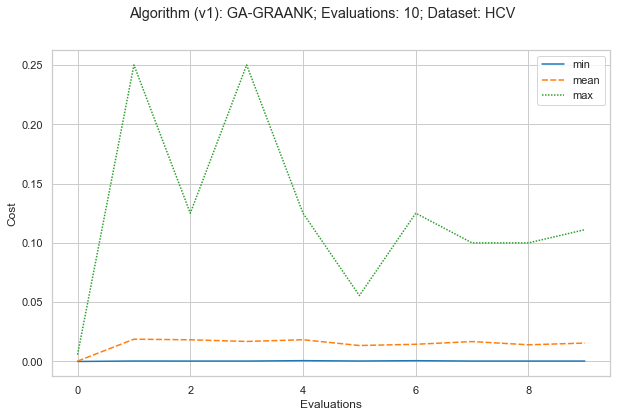

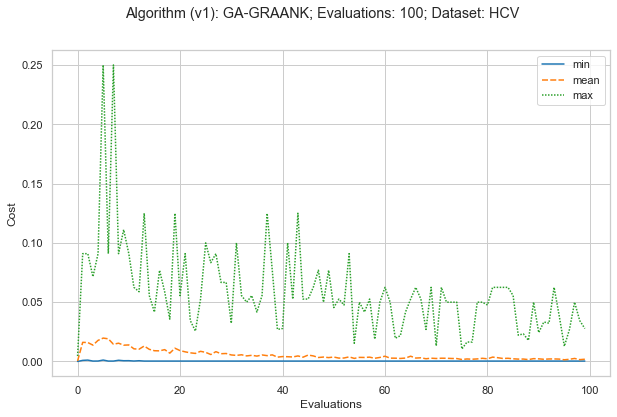

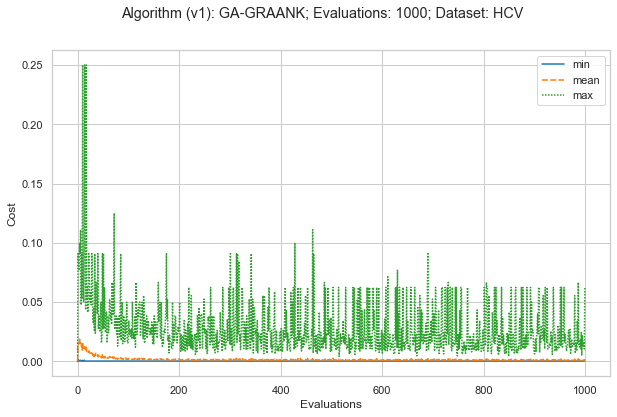

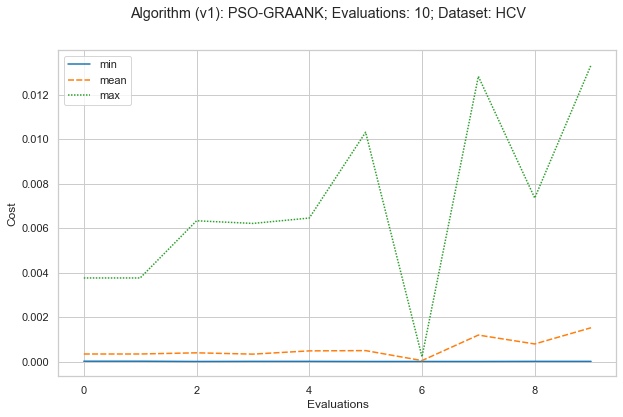

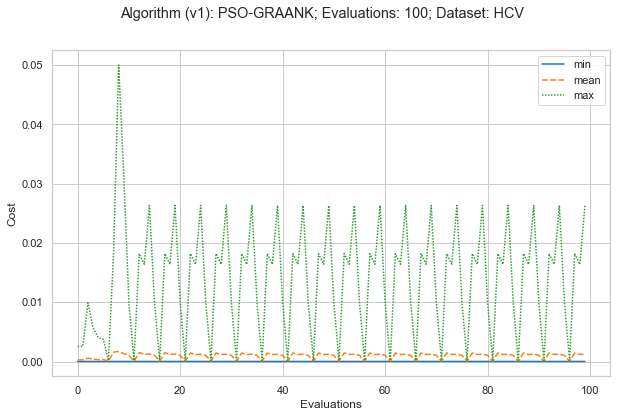

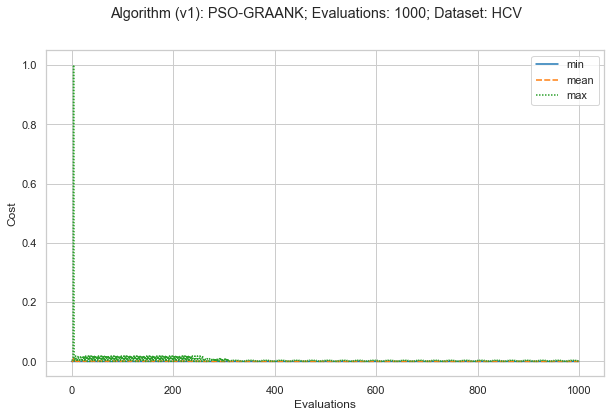

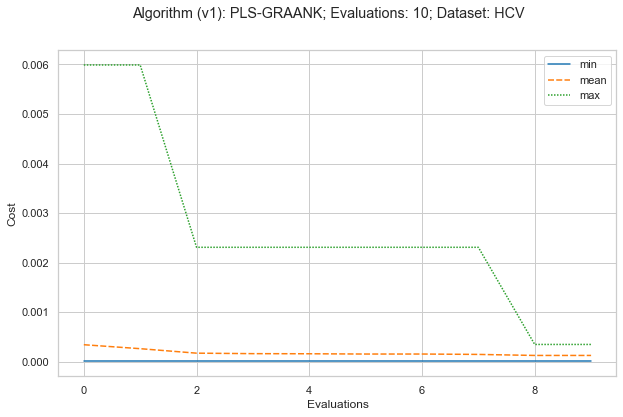

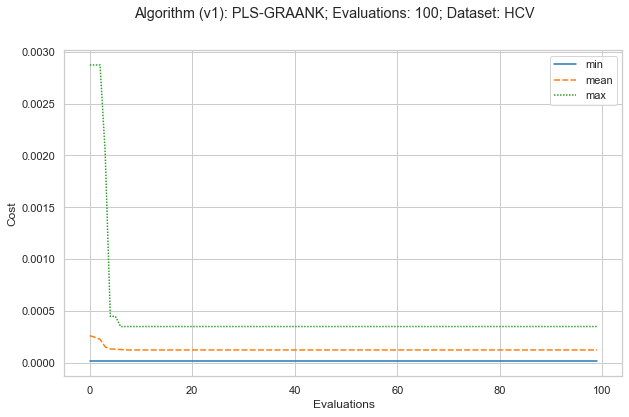

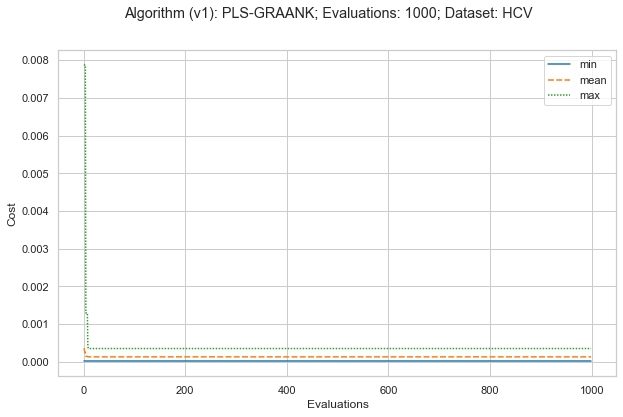

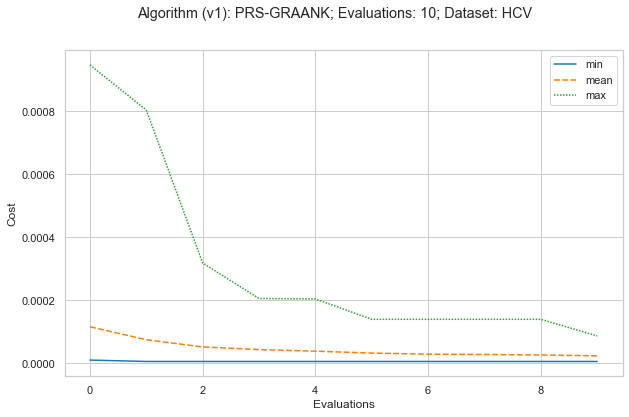

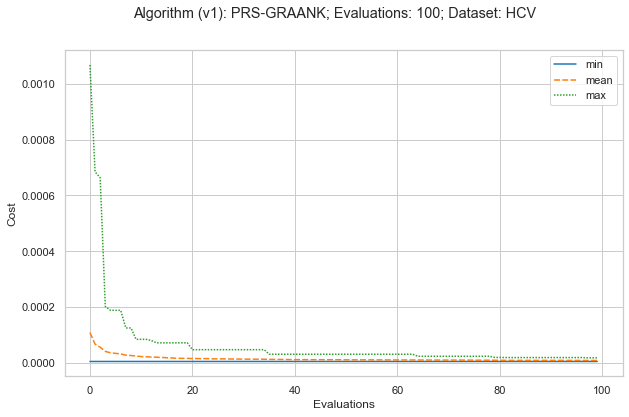

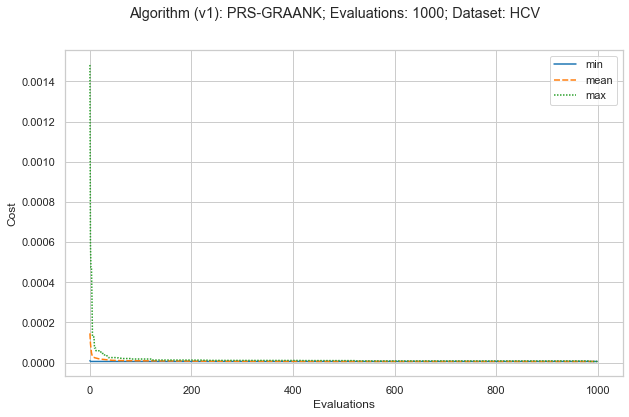

In [3]:
# Plotting the results 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

for alg in algorithms:
    df_alg = df_data.loc[df_data['Algorithm'].str.contains(alg)]
    
    for ds in data_sets:
        df1 = df_alg.loc[df_alg['Data-set'] == ds]

        for ev in evals:
            df2 = df1.loc[df1['Evaluations'] == ev]

            fig = plt.figure(figsize=(10,6))
            for index,row in df2.iterrows():
                # Results  
                values = np.array([row['Evaluations (min)'], row['Evaluations (mu)'], row['Evaluations (max)']]).T
                limits = np.arange(row['Evaluations'])
                data = pd.DataFrame(values, limits, columns=["min", "mean", "max"])
                
                sns.lineplot(data=data, palette="tab10")
                plt.xlabel('Evaluations')
                plt.ylabel('Cost')
                
            fig.suptitle('Algorithm (v1): ' + str(alg) + '; Evaluations: ' + str(row['Evaluations']) + '; Dataset: ' + ds)
    # print(data)